# Project: Wrangling and Analyze Data


TABLE OF CONTENT

.Gathering data

.Assessing data

quality issues 


tidiness issues

.Cleaning data

.Reading and Storing data

.Analyzation and visualisation of new dataset

## Data Gathering


import nnecessary package 

In [45]:
import requests 
import pandas as pd
import numpy as np
import tweepy
import matplotlib.pyplot as plt
import json


1.directly load the twitter archive file

In [2]:
twitter_archived_enhance=pd.read_csv('twitter-archive-enhanced.csv')
twitter_archived_enhance.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response =requests.get(url)
with open('image-predictions.tsv','wb') as f:
    f.write(response.content )
    

In [4]:
url=('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
image_predictions=pd.read_table('image-predictions.tsv')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
#3. loading the twitter api file from twitter using tweepy
def get_info(client_credentials ):
    access_token =get_info('access_token')
    access_secret =get_info('access_secret')
    api_key =get_info('api_key')
    api_secret =get_info('api_secret')

    auth = tweepy.OAuthHandler(api_key, api_secret)
    auth.set_access_token(access_token, access_secret)

    api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
# adding each tweet to a new line of tweet-json.txt
with open('tweet_json.txt', 'a', encoding='utf8') as f:
    for tweet_id in twitter_archived_enhance['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

In [7]:
#creating a list and reading the tweet-Jason.txt line by line in a dictionary form
twit_list=[]
for lists in open('tweet-json.txt','r'):
    twit_data=json.loads(lists)
    twit_list.append({'tweet_id':twit_data['id_str'],
                      'retweet_count':twit_data['retweet_count'],
                      'favorite_count':twit_data['favorite_count']})
                      

In [8]:
#convert it to dataframe from dictionary format
twit_data=pd.DataFrame(twit_list,columns=['tweet_id','retweet_count','favorite_count'])
twit_data.head()


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


ASSESSING DATA

Visual Assessment

The three dataset will be assessed visually and this will be done without the use of pandas function/methods i.e i would be 

checking all information in the three tables(twitter_archived_enhance,image_predictions,twit_data)


TWITTER_ARCHIVED_ENHANCE  TABLE

In [9]:
twitter_archived_enhance

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


IMAGE_PREDICTIONS TABLE

In [10]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


TWEET-JSON.TXT TABLE

In [11]:
twit_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


PROGRAMMATIC ASSESSMENT

This section involves the use of pandas functions/methods to assess each of the tables ,this assessment will also tell us about

the quality issues and tidiness our data has in which i would be able to clean in the cleaning section , this assessment would 

be done on each table (twitter_archived_enhanced,image_preedictions,twit_data)

TWITTER_ARCHIVED_ENHANCED DATA

In [12]:
twitter_archived_enhance.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


This shows the columns present in the dataset

In [13]:
# this shows information about the dataset
twitter_archived_enhance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

From this information;

it shows there are missing values in some of the columns

The datatypes aren't in the right format

The different dog stages are in different columns of which they should be merged together as a single column

In [14]:
# to check if there are any duplicates in the dataset 
sum(twitter_archived_enhance.duplicated()) 


0

From this output ,it shows there aren't duplicated values/entries

In [15]:
 #checking each value_counts for some of the columns in the dataset
twitter_archived_enhance['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
twitter_archived_enhance['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
twitter_archived_enhance['name'].value_counts()

None            745
a                55
Charlie          12
Oliver           11
Cooper           11
Lucy             11
Lola             10
Penny            10
Tucker           10
Bo                9
Winston           9
Sadie             8
the               8
Bailey            7
an                7
Daisy             7
Toby              7
Buddy             7
Oscar             6
Dave              6
Jax               6
Scout             6
Rusty             6
Bella             6
Stanley           6
Jack              6
Milo              6
Leo               6
Koda              6
very              5
               ... 
Kaia              1
Jomathan          1
Julio             1
Gerbald           1
Kaiya             1
Mookie            1
Snicku            1
unacceptable      1
Tyrus             1
Remy              1
Crawford          1
Patch             1
Cermet            1
Grizz             1
Vinscent          1
Kawhi             1
Christoper        1
Jeffri            1
Champ             1


From this result ,i observed that about 745 rows had none registered as a name of dog while some had 'a','an' registered for name of a dog which makes no sense 

In [18]:
#checking values for source column on twitteer_archived_enhanced dataset
twitter_archived_enhance.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

This shows the different source from which this tweets was commented/gotten from

In [19]:
#to get numeric data fromthe twitter archive table
twitter_archived_enhance.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


IMAGE_PRDICTIONS DATA 

In [20]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
# this shows information about the dataset
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The datatypes isn't in the right format ;tweet_id should be in strings not in int

In [22]:
# to check if there are any duplicates in the dataset 
sum(image_predictions.duplicated()) 


0

From this output ,it shows there aren't duplicated values/entries

In [23]:
#checking each value_counts for some of the columns in the dataset
image_predictions['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [24]:
image_predictions['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
Cardigan                      19
web_site                      19
beagle                        18
Eskimo_dog                    18
Maltese_dog                   18
teddy                         18
Shetland_sheepdog             18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [25]:
image_predictions['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Pembroke                           27
collie                             27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
toy_terrier                        20
Samoyed                            20
malinois                           20
chow                               20
miniature_pinscher                 20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [26]:
image_predictions['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
Pekinese                          29
toy_poodle                        29
Pomeranian                        29
Great_Pyrenees                    27
Pembroke                          27
Chesapeake_Bay_retriever          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
L

In [27]:
#to get numeric data fromthe image_predictions table
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
image_predictions['jpg_url'].duplicated().sum()

66

TWEET-JSON.TXT TABLE 

In [29]:
twit_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


This shows how many columns present in the database

In [30]:
#to see the shape of the data 
twit_data.shape

(2354, 3)

we basically have three columns and 2354 sample

In [31]:
twit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


this shows I don't have much cleaning to do as the tweet id is in a string

In [32]:
#to get numeric data fromthe image_predictions table
twit_data.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


Having assessed all the tables visually and programmatically;

This takes us to highlighting 8 quality issues and 2 tidiness needed to be corrected in this dataset which would be cleaned in

the cleaning section

QUALITY ISSUES

I will be mentioning at least 8 issues across the three datasets(twitter_archived_enhance,image_predictions,twit_data)

ISSUES

TWITTER_ARCHIVED_ENHANCED

1.Keep original(no retweets) ratings that have images

2.Delete all retweets

3.Drop unecessary columns

4.incorrect format in source column

5.wrOng datatypes in timestamp,tweet_id in twit_data is in strings and not in 

int ,will also be converting this

6.Error in names column

7.Error in rating_denominator columns

IMAGE_PREDICTIONS TABLE

8.duplicates in img_URL columns  

THESE ARE THE QUALITY ISSUES OBSERVED IN THE TWO DATASET ,THE TWEIT_DATA SET DOESN.T HAVE ANY


TIDINESS 

1.Merge doggo,floofer,pupper and puppo columns by creating a new one named dogs_breed

2.Merge clean versions of the dataset together 

3.Merge rating denominator and rating numerator column together

CLEANING DATA

Quality 1

define

keeping original copy of dataset 

code

In [33]:
#keeping clean copy of the three dataset
clean_twitter_archive=twitter_archived_enhance.copy()
clean_image_predictions=image_predictions.copy()
clean_twit_data=twit_data.copy()


QUALITY 2

define

delete all rows with retweet that has no image in the tweet i.e both the

retweeted_status_id and in_reply_to_user_id

code

In [34]:
clean_twitter_archive=clean_twitter_archive[clean_twitter_archive.retweeted_status_id.isnull()]
clean_twitter_archive=clean_twitter_archive[clean_twitter_archive.in_reply_to_user_id.isnull()]
clean_twitter_archive=clean_twitter_archive

test

In [35]:
#to verify if there are still retweets
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

QUALITY 3

define

drop uncessary columns

code



In [36]:
clean_twitter_archive.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                            'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'],axis=1,inplace=True) 

test

verify if columns have been dropped


In [37]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(8)
memory usage: 196.6+ KB


QUALITY 4

Define 

correct wrong format in source columns

code

In [44]:
clean_twitter_archive.source.str.extract('>([\w\W\s]*)<',expand=True)

,0
0,Twitter for iPhone
1,Twitter for iPhone
2,Twitter for iPhone
3,Twitter for iPhone
4,Twitter for iPhone
5,Twitter for iPhone
6,Twitter for iPhone
7,Twitter for iPhone
8,Twitter for iPhone
9,Twitter for iPhone


test

In [42]:
clean_twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

QUALITY 5

define

correct wrong datatypes to the right datatypes

i would be correcting the timestamp datatypes alone as i have

deleted the other columns whose datatypes were incorrect because they aren't 

necessary

code

In [49]:
#convert timestamp to datetime datatype
clean_twitter_archive['timestamp']=pd.to_datetime(clean_twitter_archive['timestamp']) 

test

In [50]:
clean_twitter_archive['timestamp'].dtype

dtype('<M8[ns]')

code

In [73]:
#convert tweet_id datatypes in twit_data to int
clean_twit_data['tweet_id']=clean_twit_data['tweet_id'].astype(int)

test

In [74]:
clean_twit_data['tweet_id'].dtype

dtype('int64')

it's obvious that the datatypes have been corrected

QUALITY 6

define 

there is error in the names column with 'a','an',so i would be correcting it                   

code

In [51]:
clean_twitter_archive['name'][clean_twitter_archive['name'].str.match('[a-z]+')] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


test

verify changes

In [52]:
clean_twitter_archive['name'].value_counts()

None           707
Lucy            11
Charlie         11
Oliver          10
Cooper          10
Tucker           9
Penny            9
Winston          8
Lola             8
Sadie            8
Daisy            7
Toby             7
Oscar            6
Koda             6
Bella            6
Stanley          6
Bo               6
Jax              6
Bailey           6
Scout            5
Chester          5
Rusty            5
Bentley          5
Leo              5
Buddy            5
Louis            5
Milo             5
Dave             5
Brody            4
Maggie           4
              ... 
Logan            1
Alf              1
Amy              1
Pupcasso         1
Tripp            1
Mollie           1
Snicku           1
Boots            1
Jeffri           1
Patch            1
Betty            1
Cermet           1
Grizz            1
Vinscent         1
Kawhi            1
Christoper       1
Shakespeare      1
Herb             1
Tyrus            1
Mutt             1
Champ            1
Milky       

QUALITY 7

define

correct errors in rating_denominator

code

In [53]:
clean_twitter_archive=clean_twitter_archive[clean_twitter_archive['rating_denominator']>=10] 

test

In [54]:
clean_twitter_archive['rating_denominator'].value_counts()

10     2080
50        3
11        2
80        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
Name: rating_denominator, dtype: int64

QUALITY 8

define

delet all duplicates in jpg_URL column

code

In [57]:
clean_image_predictions=clean_image_predictions.drop_duplicates(subset='jpg_url',keep="first")

test

to verify duplicate has been removed

In [58]:
clean_image_predictions['jpg_url'].duplicated().sum()

0

this shows that the duplicates has been removed.

HAVING LOOKED AT THE QUALITY ISSUES ,I WOULD BE MOVING TO THE TIDINESS SECTION

TIDINESS 1

define

Merging doggo, floofer,puppo and pupper column together as a new column 'dog_breed'

code 

In [59]:
clean_twitter_archive.doggo.replace('None',"",inplace=True) 
clean_twitter_archive.floofer.replace('None',"",inplace=True) 
clean_twitter_archive.puppo.replace('None',"",inplace=True) 
clean_twitter_archive.pupper.replace('None',"",inplace=True) 

#merge columns dog_breed together 
clean_twitter_archive ['dog_breed']=clean_twitter_archive.doggo +clean_twitter_archive.floofer +clean_twitter_archive.puppo +clean_twitter_archive.pupper

In [60]:
# View stages


clean_twitter_archive.loc[clean_twitter_archive.dog_breed=='doggopupper','dog_breed']='doggo,pupper'
clean_twitter_archive.loc[clean_twitter_archive.dog_breed=='doggofloofer','dog_breed']='doggo,floofer'
clean_twitter_archive.loc[clean_twitter_archive.dog_breed=='doggopuppo','dog_breed']='doggo,puppo'


test

In [61]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2095 non-null int64
timestamp             2095 non-null datetime64[ns]
source                2095 non-null object
text                  2095 non-null object
rating_numerator      2095 non-null int64
rating_denominator    2095 non-null int64
name                  2095 non-null object
doggo                 2095 non-null object
floofer               2095 non-null object
pupper                2095 non-null object
puppo                 2095 non-null object
dog_breed             2095 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 212.8+ KB


TIDINESS 1 CONTINUED 

define

i will be dropping the doggo ,floofer ,puppo,pupper,dog_type columns as i have successfully created a new stage called

dog_breed

code

In [62]:
clean_twitter_archive.drop(['doggo','floofer','puppo','pupper'],axis=1,inplace=True)

test

In [63]:
clean_twitter_archive.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2095 non-null int64
timestamp             2095 non-null datetime64[ns]
source                2095 non-null object
text                  2095 non-null object
rating_numerator      2095 non-null int64
rating_denominator    2095 non-null int64
name                  2095 non-null object
dog_breed             2095 non-null object
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 147.3+ KB


TIDINESS 3

define

Merging all datasets into one column

code

In [68]:
new=pd.merge(clean_twitter_archive,clean_image_predictions,on=['tweet_id'])



In [70]:
#test
#merging the First two datasets
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1968
Data columns (total 19 columns):
tweet_id              1969 non-null int64
timestamp             1969 non-null datetime64[ns]
source                1969 non-null object
text                  1969 non-null object
rating_numerator      1969 non-null int64
rating_denominator    1969 non-null int64
name                  1969 non-null object
dog_breed             1969 non-null object
jpg_url               1969 non-null object
img_num               1969 non-null int64
p1                    1969 non-null object
p1_conf               1969 non-null float64
p1_dog                1969 non-null bool
p2                    1969 non-null object
p2_conf               1969 non-null float64
p2_dog                1969 non-null bool
p3                    1969 non-null object
p3_conf               1969 non-null float64
p3_dog                1969 non-null bool
dtypes: bool(3), datetime64[ns](1), float64(3), int64(4), object(8)
memory 

In [75]:
new_df=pd.merge(new,clean_twit_data,on=['tweet_id'])

test


In [76]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1968
Data columns (total 21 columns):
tweet_id              1969 non-null int64
timestamp             1969 non-null datetime64[ns]
source                1969 non-null object
text                  1969 non-null object
rating_numerator      1969 non-null int64
rating_denominator    1969 non-null int64
name                  1969 non-null object
dog_breed             1969 non-null object
jpg_url               1969 non-null object
img_num               1969 non-null int64
p1                    1969 non-null object
p1_conf               1969 non-null float64
p1_dog                1969 non-null bool
p2                    1969 non-null object
p2_conf               1969 non-null float64
p2_dog                1969 non-null bool
p3                    1969 non-null object
p3_conf               1969 non-null float64
p3_dog                1969 non-null bool
retweet_count         1969 non-null int64
favorite_count        1969 non-nu

In [78]:
new_df['rates']=new_df['rating_numerator']/new_df['rating_denominator']

test

In [79]:
new_df['rates'].head()

0    1.3
1    1.3
2    1.2
3    1.3
4    1.2
Name: rates, dtype: float64

In [80]:
#lets check for the total columns
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1968
Data columns (total 22 columns):
tweet_id              1969 non-null int64
timestamp             1969 non-null datetime64[ns]
source                1969 non-null object
text                  1969 non-null object
rating_numerator      1969 non-null int64
rating_denominator    1969 non-null int64
name                  1969 non-null object
dog_breed             1969 non-null object
jpg_url               1969 non-null object
img_num               1969 non-null int64
p1                    1969 non-null object
p1_conf               1969 non-null float64
p1_dog                1969 non-null bool
p2                    1969 non-null object
p2_conf               1969 non-null float64
p2_dog                1969 non-null bool
p3                    1969 non-null object
p3_conf               1969 non-null float64
p3_dog                1969 non-null bool
retweet_count         1969 non-null int64
favorite_count        1969 non-nu

t shows we have 22 columns present

having dealt with the quality issues and tidiness ,i woulp proceed to store the cleaned data

STORING CLEAN DATA

In [81]:
new_df.to_csv('twitter_archived_enhance_master.csv',index=False)

READING AND LOADING STORED DATA

In [82]:
new_data=pd.read_csv('twitter_archived_enhance_master.csv') 
new_data.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_breed,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rates
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,1.3
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,1.2
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,1.3
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,1.2


since we saved our files in csv,the changed datatype was lost,hence we have to reconvert it

code

In [83]:
new_data.timestamp =pd.to_datetime(new_data.timestamp)

verify changes


In [84]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 22 columns):
tweet_id              1969 non-null int64
timestamp             1969 non-null datetime64[ns]
source                1969 non-null object
text                  1969 non-null object
rating_numerator      1969 non-null int64
rating_denominator    1969 non-null int64
name                  1969 non-null object
dog_breed             303 non-null object
jpg_url               1969 non-null object
img_num               1969 non-null int64
p1                    1969 non-null object
p1_conf               1969 non-null float64
p1_dog                1969 non-null bool
p2                    1969 non-null object
p2_conf               1969 non-null float64
p2_dog                1969 non-null bool
p3                    1969 non-null object
p3_conf               1969 non-null float64
p3_dog                1969 non-null bool
retweet_count         1969 non-null int64
favorite_count        1969 non-nul

ANALYSING AND VISUALISATION OF NEW_DATA DATASET

This involves stating insights and using visuals to explain the insights

insights includes;

1.correlation between dog names and dog ratings

2.what is the most popular dog type(saved as dog_breed in my work)

3.what is the most popular dog name

INSIGHT 1 CORRELATION BETWEEN DOG NAMES AND DOG RATINGS

VISUALIZATION

In [85]:
dog_ratings_correlation=new_data.groupby('name')['rates']
dog_ratings_correlation

There's no correlation as name is in string and rates is in float datatype 

INSIGHT 2 WHAT IS THE MOST POPULAR DOG BREED

VISUALIZATION

In [86]:
popular_dog_breed=new_data.dog_breed.value_counts()
popular_dog_breed

pupper           201
doggo             63
puppo             22
doggo,pupper       8
floofer            7
doggo,floofer      1
doggo,puppo        1
Name: dog_breed, dtype: int64

from this insight ,it showsthat 'pupper' is the most popular dog_breed(i.e type of dog) but a bar-chart will be used to further 

visualization

Text(0,0.5,'total time appeared')

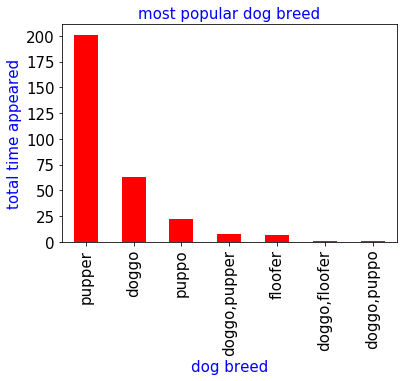

In [87]:
popular_dog_breed.plot.bar(color='red',fontsize=15)
plt.title('most popular dog breed',color='blue',fontsize='15')
plt.xlabel('dog breed',color='blue',fontsize='15')
plt.ylabel('total time appeared',color='blue',fontsize='15')


From the chart ,it is very obvious  that the most popular dog breed(type of dog) is the pupper   

INSIGHT  3 WHAT IS THE MOST POPULAR DOG NAME?

In [88]:
popular_dog_name=new_data.name.value_counts()[1:20]
popular_dog_name

Charlie    11
Cooper     10
Lucy       10
Oliver     10
Tucker      9
Penny       9
Winston     8
Sadie       8
Toby        7
Daisy       7
Lola        7
Koda        6
Stanley     6
Bo          6
Bella       6
Jax         6
Chester     5
Dave        5
Milo        5
Name: name, dtype: int64

from this insight ,it shows that the most popular dog name is charlie 

A bar chart willl be used for further analysis showing the visuals

Text(0,0.5,'total time appeared')

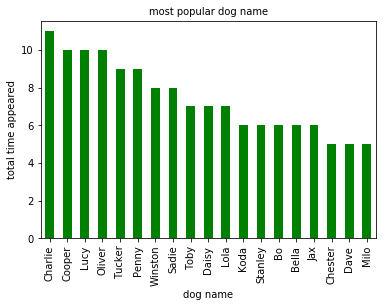

In [89]:
popular_dog_name.plot.bar(color='green',fontsize='10')
plt.title('most popular dog name',color='black',fontsize='10')
plt.xlabel('dog name',color='black',fontsize='10')
plt.ylabel('total time appeared',color='black',fontsize='10')


From this insight it shows that charlie is the most popular dog name used

​

In [90]:
from subprocess import call
call(['python','-m', 'nbconvert', 'wrangle_act.ipynb'])




0